# Wine Quality Analysis

## A. DENNY THOMAS

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [3]:
data = pd.read_csv("Red_wine.csv")

In [4]:
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

In [5]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1598.000000  1599.000000   
mean      0.087467            15.874922             46.433041     0.996747   
std       0.047065            10.460157             32.876249     0.001887   
min       0.012000             1.000000         

In [6]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [7]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [8]:
data = data.dropna(subset=["quality"])

In [9]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [12]:
clf = RandomForestClassifier()
clf.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [13]:
y_pred = clf.predict(X_test_imputed)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        11
         5.0       0.77      0.81      0.79       145
         6.0       0.64      0.71      0.67       123
         7.0       0.63      0.51      0.57        37
         8.0       1.00      0.25      0.40         4

    accuracy                           0.70       320
   macro avg       0.61      0.46      0.49       320
weighted avg       0.68      0.70      0.69       320



### Visualization of the actual vs. predicted values

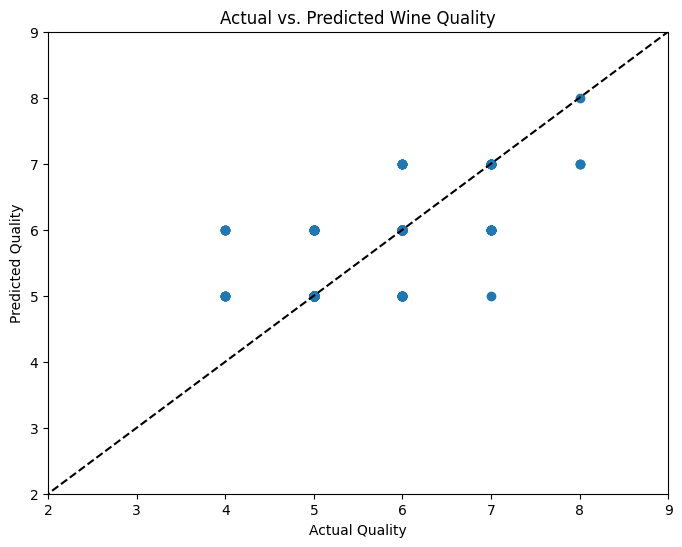

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], '--k')  # Diagonal line representing perfect predictions
plt.title("Actual vs. Predicted Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

### Visualization of the Residuals

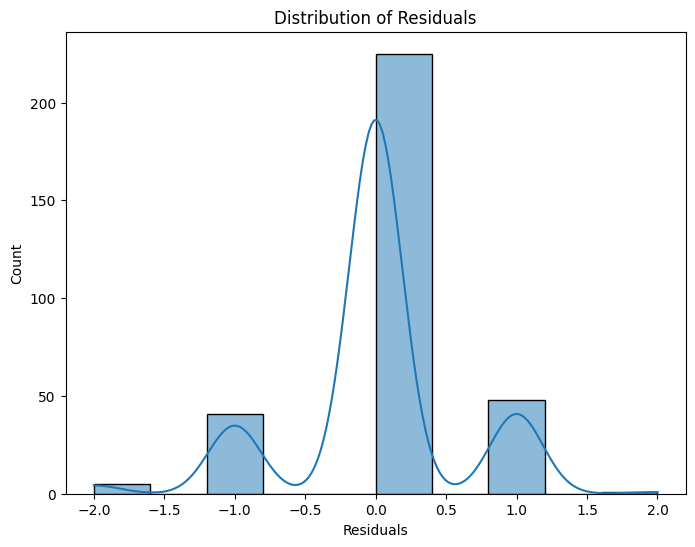

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

### Correlation Heatmap

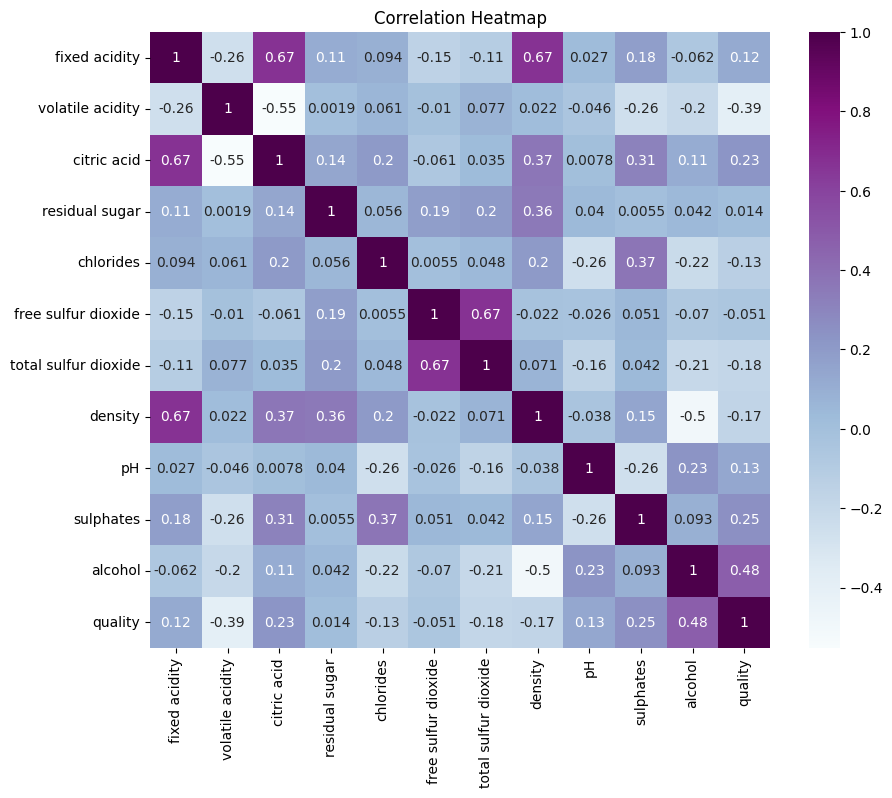

In [26]:

corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="BuPu")
plt.title("Correlation Heatmap")
plt.show()

### Histogram of Wine Quality

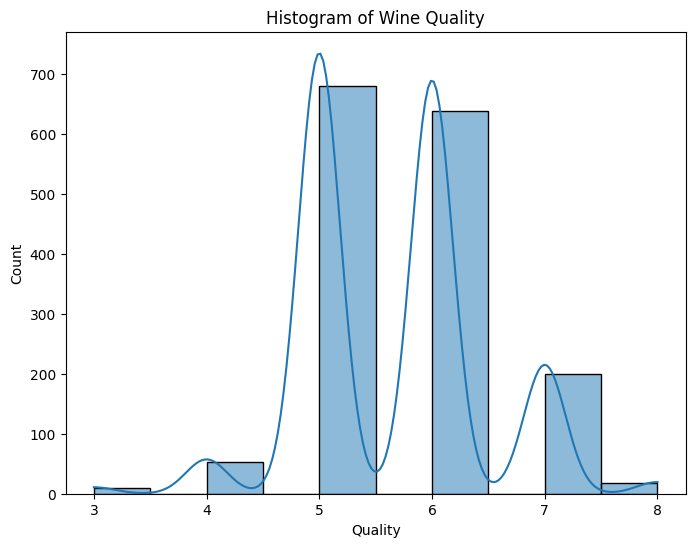

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="quality", kde=True, bins=10)
plt.title("Histogram of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()